# Milestone 1: Data Exploration
### Install Hints
Make sure to install your conda environment using the doc/envs/pydrop_dev.yml file for the most consistent results
### Goals
The goals of this notebook are to:
1. Begin plotting the data from a single channel and visualize the distribution and spread of samples. 
2. Obtain basic descriptive statistics and attempt to fit a normal distribution to gauge spread.
3. Code an initial clustering proof-of-concept to begin modeling progress. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
from sklearn.cluster import KMeans

## Data Plotting/Visualization

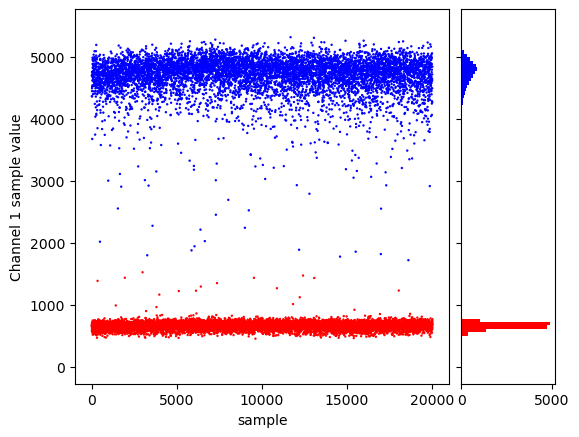

In [2]:
dframe = pd.read_csv("../data/X001_droplet_amplitudes.csv", header=0)
cluster0 = dframe[dframe['Cluster_1'] == 0]['Ch1'].to_numpy()  # create numpy array for calculations
cluster1 = dframe[dframe['Cluster_1'] == 1]['Ch1'].to_numpy()
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax_histy.tick_params(axis="y", labelleft=False)
# Draw the scatter plot and marginals.
colors_dict = {0: 'r', 1: 'b'}
colors = [colors_dict[id] for id in dframe['Cluster_1']]
ax.scatter(dframe["droplet"], dframe["Ch1"], s=0.5, c=colors)
ax.set_xlabel("sample")
ax.set_ylabel("Channel 1 sample value")

ybins = np.linspace(0, 5500, 100)
ax_histy.hist(cluster0, bins=ybins, orientation='horizontal', color='r')
ax_histy.hist(cluster1, bins=ybins, orientation='horizontal', color='b')
plt.show()

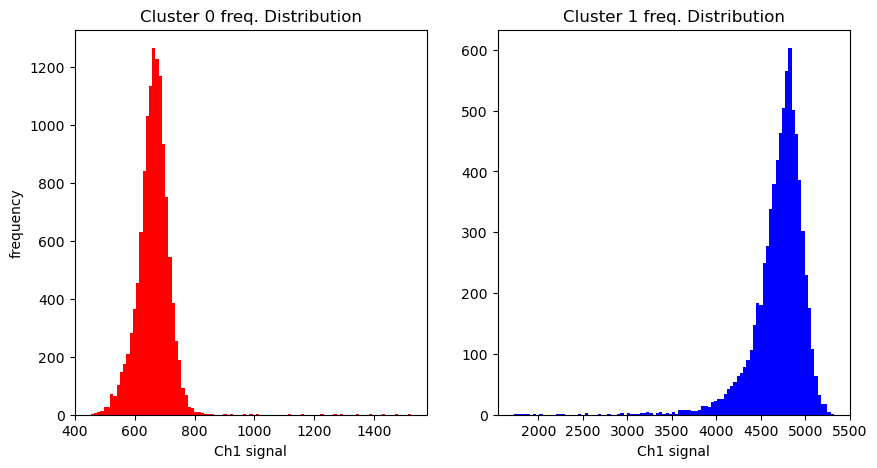

In [3]:
bins = np.linspace(0, 6000, 100)
fig2 = plt.figure(2, figsize=[10,5])
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
bins = np.linspace(np.min(cluster0), np.max(cluster0), 100)
ax1.hist(cluster0, bins, label = 'cluster 0', color='r')
bins = np.linspace(np.min(cluster1), np.max(cluster1), 100)
ax2.hist(cluster1, bins, label = 'cluster 1', color='b')
ax1.set_xlabel("Ch1 signal")
ax2.set_xlabel("Ch1 signal")
ax1.set_ylabel("frequency")
ax1.set_title("Cluster 0 freq. Distribution")
ax2.set_title("Cluster 1 freq. Distribution")
plt.show()

## Data Statistics for Each Cluster (using pre-marked data)

In [4]:
cluster0_df = dframe[dframe['Cluster_1'] == 0]['Ch1']
cluster1_df = dframe[dframe['Cluster_1'] == 1]['Ch1']
print("________________________________")
print("Summary Statistics for Cluster 0")
print("================================")
print(cluster0_df.describe())
print("________________________________")
print("Summary Statistics for Cluster 1")
print("================================")
print(cluster1_df.describe())

________________________________
Summary Statistics for Cluster 0
count    12575.000000
mean       661.890496
std         54.585419
min        452.814026
25%        633.572150
50%        664.688000
75%        692.867800
max       1524.424320
Name: Ch1, dtype: float64
________________________________
Summary Statistics for Cluster 1
count    7453.000000
mean     4699.518277
std       302.011051
min      1720.057000
25%      4591.542000
50%      4756.846000
75%      4879.360000
max      5320.715330
Name: Ch1, dtype: float64


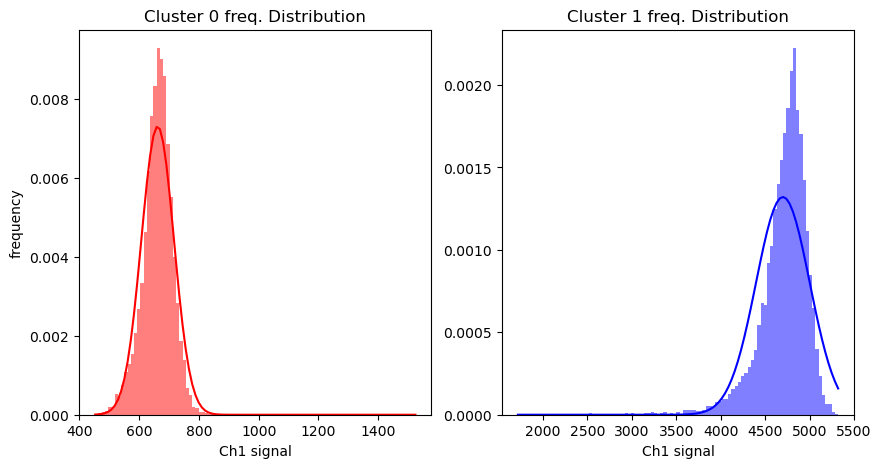

In [5]:
# to verify our mean and stdev. let's try fitting a basic normal distribution to see how skewed the data is:
bins = np.linspace(0, 6000, 100)
fig2 = plt.figure(2, figsize=[10,5])
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
bins = np.linspace(np.min(cluster0), np.max(cluster0), 100)
ax1.hist(cluster0, bins, label='cluster 0', color='r', density=True, alpha=0.5)
ax1.plot(bins, norm.pdf(bins, np.mean(cluster0), np.std(cluster0)), c='r')
bins = np.linspace(np.min(cluster1), np.max(cluster1), 100)
ax2.hist(cluster1, bins, label = 'cluster 1', color='b', density=True, alpha=0.5)
ax2.plot(bins, norm.pdf(bins, np.mean(cluster1), np.std(cluster1)), c='b')
ax1.set_xlabel("Ch1 signal")
ax2.set_xlabel("Ch1 signal")
ax1.set_ylabel("frequency")
ax1.set_title("Cluster 0 freq. Distribution")
ax2.set_title("Cluster 1 freq. Distribution")
plt.show()

## Initial sklearn Proof-of-Concept Classification

In [6]:
K = 2
X = dframe['Ch1'].to_numpy().reshape(-1, 1)
true_y = dframe["Cluster_1"].to_numpy()
clustering = KMeans(n_clusters=K)
clustering.fit(X)
predictions = clustering.predict(X)
centers = clustering.cluster_centers_
if centers[0,0] < centers[1,0]:  # flip so that cluster "0" corresponds to the 
    predictions = np.logical_not(predictions)  # cluster with lowest mean value

overlap = predictions == true_y
true_overlap = overlap[overlap == 0]
frac_correct = len(true_overlap)/len(overlap)

print(f"Fraction of points correctly classified: {frac_correct}")

Fraction of points correctly classified: 0.9991511883363291


c:\Users\markr\anaconda3\envs\pydrop_dev\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
